In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
%matplotlib inline

---
Loading a file containing signals from a scintillator experiment as numpy arrays

In [2]:
f_path = '../Data/signals/'
filename1 = f_path + "ch1_test.csv"
filename2 = f_path + "ch2_test.csv"

In [3]:
ch1_np = np.loadtxt(filename1, delimiter=',', dtype=np.float32)
ch2_np = np.loadtxt(filename2, delimiter=',', dtype=np.float32)

---
Let's see the first event from both files:

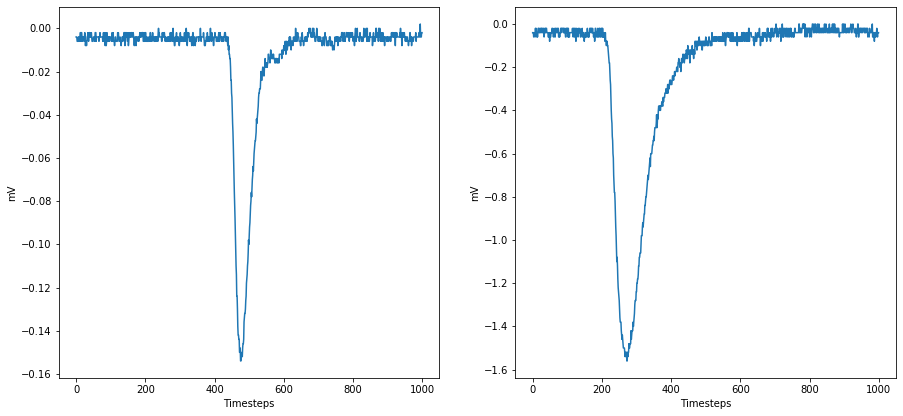

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(ch1_np[0])
plt.xlabel("Timesteps")
plt.ylabel("mV")
plt.subplot(222)
plt.plot(ch2_np[0])
plt.xlabel("Timesteps")
plt.ylabel("mV")
plt.show()

---
Now we can try to save these data in a root file, using uproot

In [5]:
with uproot.recreate("channel_data.root", compression=None) as f:
    f["channels"] = uproot.newtree({"channel1": uproot.newbranch(np.dtype(">f8"), "ch1", shape=ch1_np.shape),
                             "channel2": uproot.newbranch(np.dtype(">f8"), "ch2", shape=ch2_np.shape)})
    f["channels"].extend({"channel1": ch1_np, "channel2": ch2_np})